In [1]:
from sympy import Symbol, lambdify
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = Symbol('x')

In [3]:
def gradient_descent(
    function, start, learn_rate, n_iter=10000, tolerance=1e-06, step_size=1
):
    # Generate the gradient function for the given input function
    gradient = lambdify(x, function.diff(x))
    # Convert the function into a form that can be evaluated numerically
    function = lambdify(x, function)
    points = [start]  # Store initial point in a list
    iters = 0  # Counter to track iterations
    
    # Loop to perform gradient descent until convergence or maximum iterations
    while step_size > tolerance and iters < n_iter:
        prev_x = start  # Store current x value in prev_x
        # Update the value of x using the gradient descent formula
        start = start - learn_rate * gradient(prev_x)
        # Calculate the change in x for convergence check
        step_size = abs(start - prev_x)
        iters = iters + 1  # Increment the iteration count
        points.append(start)  # Append the new x value to points list

    print("The local minimum occurs at", start)
    
    # Create arrays for plotting the function
    x_ = np.linspace(-7, 5, 100)  # X-axis range
    y = function(x_)  # Y values calculated based on the function
    
    # Setting up the plot layout
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Plot the function and the points calculated during gradient descent
    plt.plot(x_, y, 'r')  # Plot the function
    plt.plot(points, function(np.array(points)), '-o')  # Plot the calculated points
    
    # Display the plot
    plt.show()


The local minimum occurs at -2.999998673556482


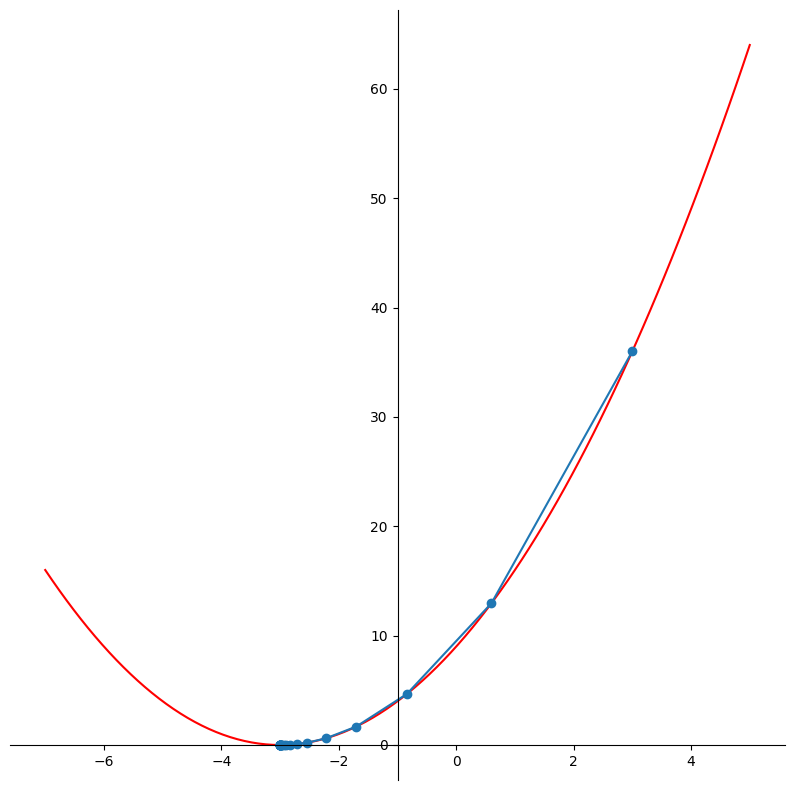

In [4]:
# Define the function
function = (x + 3) ** 2

# Call the gradient_descent function with specified parameters
gradient_descent(
    function=function,  # The function to be minimized
    start=3.0,  # The initial starting point for gradient descent
    learn_rate=0.2,  # The learning rate or step size for gradient descent
    n_iter=50  # The number of iterations for gradient descent
)


# Theory
**Gradient Descent: Theory**

**Purpose**:
Gradient Descent is an iterative optimization algorithm employed for minimizing a function to find its local minimum or to improve the parameters of a model. It is widely used in machine learning for model training and optimization.

**Algorithm Overview**:
- **Objective**: Given a function that needs to be minimized, the algorithm seeks the local minimum.
- **Gradient**: At each iteration, the gradient (derivative) of the function is computed. The gradient points towards the direction of the steepest ascent.
- **Step Direction**: The algorithm moves in the opposite direction of the gradient to descend toward the local minimum.
- **Learning Rate**: A hyperparameter determining the size of steps taken during each iteration. It influences the convergence and determines the speed of convergence.
- **Algorithmic Steps**:
  - Initialize starting point (can be random or a fixed value).
  - Compute the derivative (gradient) of the function.
  - Update the parameters iteratively by moving in the opposite direction of the gradient and by an amount determined by the learning rate.
  - Repeat until a stopping criterion is met (e.g., a specific number of iterations or when the change becomes negligible).

**Types**:
1. **Batch Gradient Descent**: Computation of gradient over the entire dataset.
2. **Stochastic Gradient Descent (SGD)**: Computation of gradient for each individual sample in the dataset.
3. **Mini-batch Gradient Descent**: Computation of gradient for small random subsets of the dataset.

**Issues and Variants**:
- **Convergence**: It might get stuck in local minima, especially in non-convex functions.
- **Learning Rate**: Choosing an appropriate learning rate is crucial. A large rate might overshoot the minimum, while a small one might slow down convergence.
- **Variants**: Momentum, Adagrad, RMSprop, Adam are variants that address issues and speed up convergence.

**Application**:
- Widely used in optimizing machine learning models by minimizing cost functions (e.g., in linear regression, neural networks).
- Used for training models in various algorithms like linear regression, logistic regression, neural networks, etc.

**Conclusion**:
Gradient Descent is a fundamental optimization algorithm that plays a vital role in many optimization problems, especially in the context of machine learning and artificial intelligence, aiding in the continuous improvement of models by minimizing their associated cost or objective functions.